# Predicción de admisiones estudiantiles con KERAS.

## Mi primera red neuronal ?

Información de la UCLA basada en 3 datos:

   - GRE Scores (Test)
   - GPA Scores (Grades)
   - Class rank (1-4)

El dataset original se encuentra en: http://www.ats.ucla.edu/ y en este mismo apartado corresponde al file *binary.csv* extraido directaemten del sitio.

Debe tener instalado en el ambiente de trabajo Pandas, Keras etc.

# 1. Carga y vizualización de datos:

Para cargar los datos usamos load the data, usaremos un paquete de datos muy útil llamado Pandas. Puede leer en la documentación de Pandas aquí: https://pandas.pydata.org/


In [19]:
import pandas as pd
data = pd.read_csv('https://stats.idre.ucla.edu/stat/data/binary.csv')
print(data)

     admit  gre   gpa  rank
0        0  380  3.61     3
1        1  660  3.67     3
2        1  800  4.00     1
3        1  640  3.19     4
4        0  520  2.93     4
..     ...  ...   ...   ...
395      0  620  4.00     2
396      0  560  3.04     3
397      0  460  2.63     2
398      0  700  3.65     2
399      0  600  3.89     3

[400 rows x 4 columns]


### Visualización de datos:

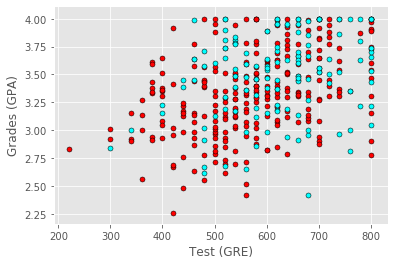

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import numpy as np
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
plot_points(data)
plt.show()

En apariencia GRADES y TEST no parecen tener relación clara.

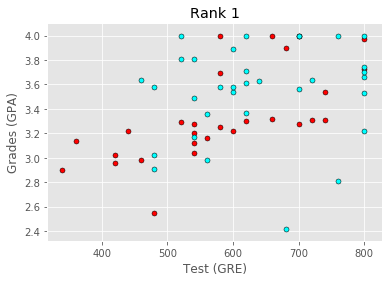

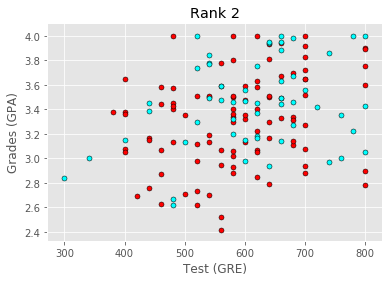

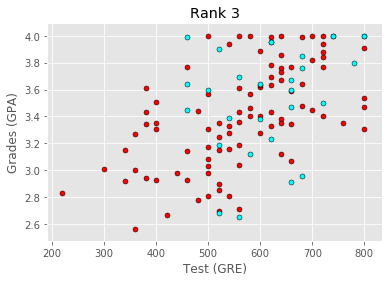

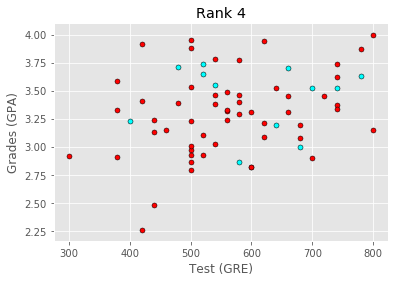

In [21]:
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Parece ser que por RANK la relación es un poco más clara en algunos casos, se procede a construir una MLP con RANK, GRE y GPA.

# 2. Procesado de datos:

- Se remueven NaNs
- One-hot encode con rank
- Normalizacion de GRE y GPA, de manera que queden en el rango (0,1)
- Se parten los datos en input X - labels y

In [22]:
import keras
from keras.utils import np_utils

# remove NaNs
data = data.fillna(0)

# One-hot encoding the rank
processed_data = pd.get_dummies(data, columns=['rank'])

# Normalizing the gre and the gpa scores to be in the interval (0,1)
processed_data["gre"] = processed_data["gre"]/800
processed_data["gpa"] = processed_data["gpa"]/4

# Splitting the data input into X, and the labels y 
X = np.array(processed_data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["admit"],2)

In [23]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (400, 6)

Shape of y: (400, 2)

First 10 rows of X
[[0.475  0.9025 0.     0.     1.     0.    ]
 [0.825  0.9175 0.     0.     1.     0.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.8    0.7975 0.     0.     0.     1.    ]
 [0.65   0.7325 0.     0.     0.     1.    ]
 [0.95   0.75   0.     1.     0.     0.    ]
 [0.7    0.745  1.     0.     0.     0.    ]
 [0.5    0.77   0.     1.     0.     0.    ]
 [0.675  0.8475 0.     0.     1.     0.    ]
 [0.875  0.98   0.     1.     0.     0.    ]]

First 10 rows of y
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


# 3. Partición de los datos en training y testing:

In [24]:
# break training set into training and validation sets
(X_train, X_test) = X[50:], X[:50]
(y_train, y_test) = y[50:], y[:50]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (350, 6)
350 train samples
50 test samples


# 4. Definición de la arquitectura de la red neuronal:

In [25]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model

model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_18 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_19 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 130       
_________________________________________________________________
activation_20 (Activation)   (None, 2)                 0         
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


# 5. Entrenamiento del modelo:

In [26]:
# Training the model
model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
#model.fit(X_train, y_train, epochs=1000, batch_size=100, verbose=0)

# 6. Score del modelo:

In [27]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 255us/step

 Training Accuracy: 0.7228571421759469
50/50 [==============================] - 0s 45us/step

 Testing Accuracy: 0.6399999976158142


# 7. Play with parameters!

- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, ada
- epochs? batches?



Un pequeño ejercicio agregando dropout...

In [28]:
model = Sequential()

model.add(Dense(128, input_dim=6))
model.add(Activation('tanh'))
model.add(Dropout(.3)) # now using dropout

model.add(Dense(64))
model.add(Activation('tanh'))
model.add(Dropout(.2)) # now using dropout

model.add(Dense(32))
model.add(Activation('tanh'))
model.add(Dropout(.1)) # now using dropout

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
__________

In [29]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=100, verbose=0)

In [30]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

350/350 [==============================] - 0s 330us/step

 Training Accuracy: 0.7285714309556144
50/50 [==============================] - 0s 41us/step

 Testing Accuracy: 0.6799999976158142


## Mejora en el modelo anterior (Tarea)...